In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

#### Import the CSV Data as Pandas Dataframe

In [68]:
df =pd.read_csv('./data/stud.csv')

#### Show the top 5 records

In [69]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Prepare X and Y variables

In [70]:
X =df.drop(columns=['math_score'],axis=1)
y =df['math_score']

In [71]:
# Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
# create column transformer with 3 types of transformers

num_features =X.select_dtypes(exclude='object').columns
cat_features =X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer =StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor =ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ],
)


In [73]:
X_train = preprocessor.fit_transform(X_train)
X_test =preprocessor.transform(X_test)

In [74]:
X.shape

(1000, 7)

In [76]:
# create an evaluation function to give all metrics after model training

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse =mean_squared_error(true,predicted)
    rmse =np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae,rmse,r2_square

In [78]:
# model list 

models ={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "RandomForest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose= False),
    "AdaBoostRegressor":AdaBoostRegressor() 
}

model_list =[]
r2_score_list =[]

for model_name,model_function in models.items():
    model = model_function

    model.fit(X_train,y_train)

    #make predictions
    y_train_pred =model.predict(X_train)
    y_test_pred =model.predict(X_test)

    #Evaluate the model
    model_train_mae,model_train_rmse,model_train_r2 =evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    model_list.append(model_name)
    r2_score_list.append(model_test_r2)
    print(model_name)
    print("Model performance for Training set")
    print("--Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("--Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("--R2 Score : {:.4f}".format(model_train_r2))
    
    print("-"*30)

    print("Model performance for Testing set")
    print("--Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("--Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("--R2 Score : {:.4f}".format(model_test_r2))

    print("=="*30)
    print("\n")

LinearRegression
Model performance for Training set
--Root Mean Squared Error : 5.3231
--Mean Absolute Error : 4.2667
--R2 Score : 0.8743
------------------------------
Model performance for Testing set
--Root Mean Squared Error : 5.3940
--Mean Absolute Error : 4.2148
--R2 Score : 0.8804


Ridge
Model performance for Training set
--Root Mean Squared Error : 5.3233
--Mean Absolute Error : 4.2650
--R2 Score : 0.8743
------------------------------
Model performance for Testing set
--Root Mean Squared Error : 5.3904
--Mean Absolute Error : 4.2111
--R2 Score : 0.8806


Lasso
Model performance for Training set
--Root Mean Squared Error : 6.5925
--Mean Absolute Error : 5.2053
--R2 Score : 0.8072
------------------------------
Model performance for Testing set
--Root Mean Squared Error : 6.5173
--Mean Absolute Error : 5.1557
--R2 Score : 0.8254


KNN
Model performance for Training set
--Root Mean Squared Error : 5.6948
--Mean Absolute Error : 4.5012
--R2 Score : 0.8562
------------------------

In [84]:
# Results

results =pd.DataFrame(list(zip(model_list,r2_score_list)),columns=["Model","R2 Score"])
results

,Model,R2 Score
0,LinearRegression,0.880433
1,Ridge,0.880592
2,Lasso,0.825446
3,KNN,0.786260
4,DecisionTree,0.740238
5,RandomForest,0.852022
6,XGBRegressor,0.827797
7,CatBoostRegressor,0.851831
8,AdaBoostRegressor,0.850494


In [85]:
# Linear Regression

lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred =lin_model.predict(X_test)
score =r2_score(y_test,y_pred)

print("Accuracy of the model is %.2f " %score)


Accuracy of the model is 0.88 


Text(0, 0.5, 'Predicted')

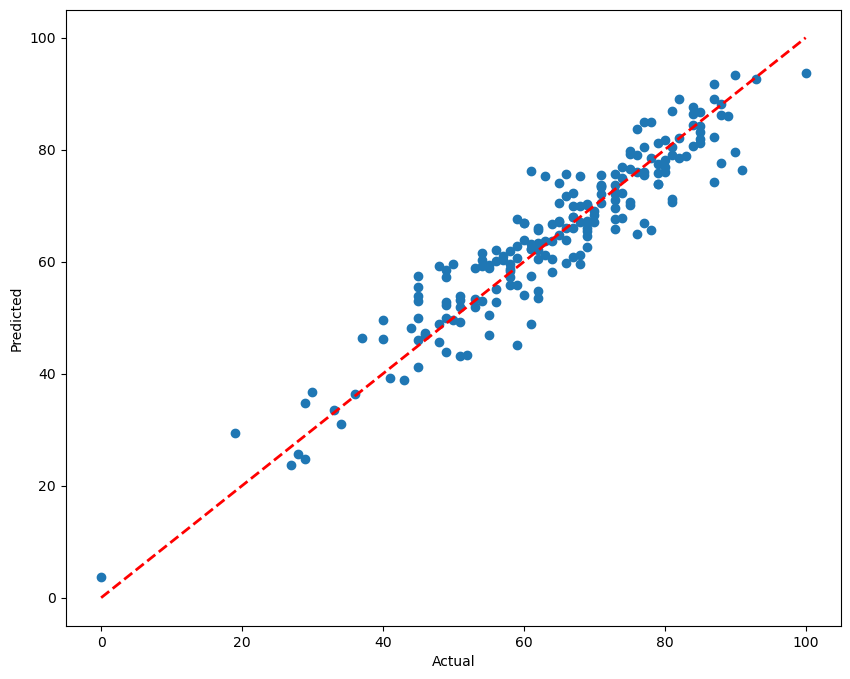

In [97]:
# plot y_pred and y_test
fig,ax =plt.subplots(figsize =(10,8))

ax.scatter(y_test,y_pred)
# 2. Add the "Perfect Prediction" line (y = x)
# This helps visualize how far off the predictions are
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
ax.plot([min_val, max_val], [min_val, max_val], color='red',
         lw=2, linestyle='--', label='Perfect Fit')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")

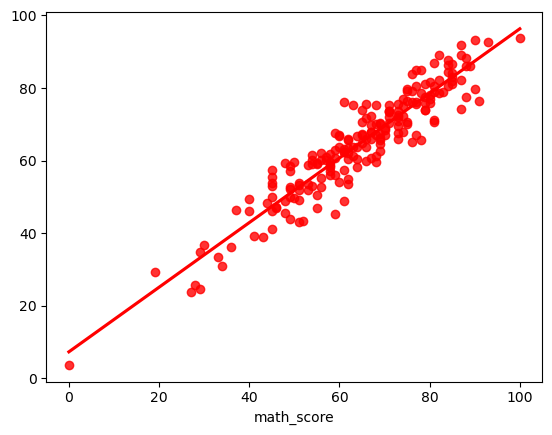

In [96]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred,ci=None,color ='red');